# Exploratory Data Analysis (EDA)

**Project:** Starbucks Capstone Challenge  
**Author:** Yousef Ismail Ahmed

This notebook performs exploratory data analysis on the **final cleaned dataset**
produced in the `Cleaning_and_Preparation` notebook. Each row represents a unique
**customer–offer interaction**.

The analysis focuses on understanding customer demographics, offer characteristics,
and engagement patterns to support downstream analysis and modeling.

**The goal of this analysis is to:**

- Understand customer demographics
- Explore offer characteristics
- Identify behavioral and engagement patterns
- These insights support downstream modeling and business decision-making.


## Analysis Questions

- How do customer demographics (age, gender, income) relate to offer engagement?
- How do offer characteristics differ across offer types?
- What behavioral patterns emerge throughout the offer lifecycle?

Exploratory Data Analysis (EDA) is performed to better understand the dataset,
identify patterns, relationships, and potential insights that can support
business understanding and future modeling.

The analysis is structured into three main levels:
1. Univariate Analysis
2. Bivariate Analysis
3. Multivariate Analysis


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


plt.style.use('default')

## 1. Load Final Clean Dataset

In [2]:
df = pd.read_csv('../../03_Data/Processed_Data/final_Cleaned_Data.csv')
df.head()

gender  age                            person  became_member_year  \
0      F   55  0610b486422d4921ae7d2bf64640c50b                2017   
1      F   75  78afa995795e4d85b5d9ceeca43f5fef                2017   
2      F   75  78afa995795e4d85b5d9ceeca43f5fef                2017   
3      M   68  e2127556f4f64592b11af22de27a7932                2018   
4      M   68  e2127556f4f64592b11af22de27a7932                2018   

   became_member_month  became_member_day  login_days    income  \
0                    7                 15         376  112000.0   
1                    5                  9         443  100000.0   
2                    5                  9         443  100000.0   
3                    4                 26          91   70000.0   
4                    4                 26          91   70000.0   

            event                    value/offer id  time  reward  difficulty  \
0     transaction                                 0    18     0.0         0.0   
1  offer received  9b98b8c7a33c4b65b9aebfe6a799e6d9     0     5.0         5.0   
2    offer viewed  9b98b8c7a33c4b65b9aebfe6a799e6d9     6     5.0         5.0   
3  offer received  2906b810c7d4411798c6938adc9daaa5     0     2.0        10.0   
4    offer viewed  2906b810c7d4411798c6938adc9daaa5    18     2.0        10.0   

   duration offer_type became_member  
0       0.0   no_offer    2017-07-15  
1       7.0       bogo    2017-05-09  
2       7.0       bogo    2017-05-09  
3       7.0   discount    2018-04-26  
4       7.0   discount    2018-04-26

In [3]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35496 entries, 0 to 35495
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               35496 non-null  object 
 1   age                  35496 non-null  int64  
 2   person               35496 non-null  object 
 3   became_member_year   35496 non-null  int64  
 4   became_member_month  35496 non-null  int64  
 5   became_member_day    35496 non-null  int64  
 6   login_days           35496 non-null  int64  
 7   income               35496 non-null  float64
 8   event                35496 non-null  object 
 9   value/offer id       35496 non-null  object 
 10  time                 35496 non-null  int64  
 11  reward               35496 non-null  float64
 12  difficulty           35496 non-null  float64
 13  duration             35496 non-null  float64
 14  offer_type           35496 non-null  object 
 15  became_member        35496 non-null 

In [4]:
categorcial = df.select_dtypes(include="O").columns.to_list()
numerical=df.select_dtypes(exclude="O").columns.to_list()

In [5]:
categorcial

['gender', 'person', 'event', 'value/offer id', 'offer_type', 'became_member']

In [6]:
numerical

['age',
 'became_member_year',
 'became_member_month',
 'became_member_day',
 'login_days',
 'income',
 'time',
 'reward',
 'difficulty',
 'duration']

## 1) Univariate Analysis

Univariate analysis focuses on analyzing **one variable at a time**.
The goal is to understand the distribution, frequency, and basic characteristics
of individual features without considering relationships with other variables.


This section includes:
- Distribution of categorical variables (e.g. gender, event, offer_type)
- Distribution of numerical variables (e.g. age, income, login_days)


-------------

### i. Categorical Feature Analysis

Key categorical features such as gender, offer type, and event type are analyzed using bar charts to understand distribution and frequency.

- Gender distribution highlights the demographic composition of the customer base.
- Offer type distribution shows the prevalence of different promotional strategies.
- Event distribution reveals the engagement funnel from offer receipt to completion.

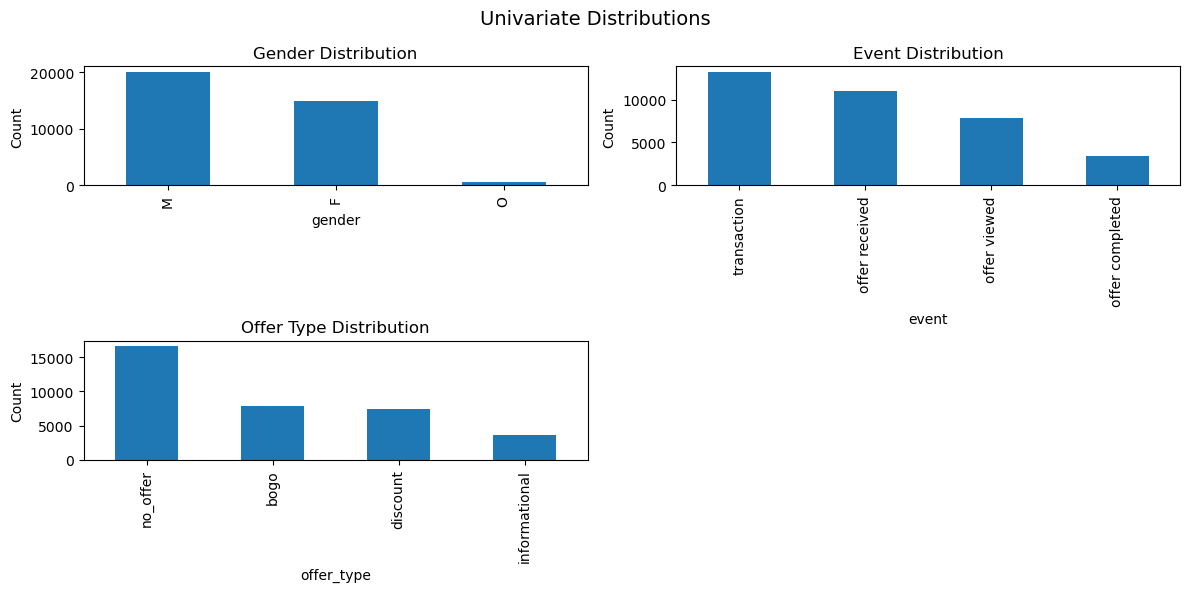

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
fig.suptitle("Univariate Distributions", fontsize=14)

# Gender Distribution
df['gender'].value_counts().plot(
    kind='bar',
    ax=axes[0, 0],
    title='Gender Distribution'
)
axes[0, 0].set_ylabel('Count')

# Event Distribution
df['event'].value_counts().plot(
    kind='bar',
    ax=axes[0, 1],
    title='Event Distribution'
)
axes[0, 1].set_ylabel('Count')

# Offer Type Distribution
df['offer_type'].value_counts().plot(
    kind='bar',
    ax=axes[1, 0],
    title='Offer Type Distribution'
)
axes[1, 0].set_ylabel('Count')

axes[1, 1].axis('off')

plt.tight_layout()
plt.show()


-------------

### ii. Numerical Feature Distributions

Histograms are used to explore numerical variables including:
- Age
- Income
- Customer tenure (login_days)
- These distributions provide insight into customer profiles and spending capacity.

In [8]:
df[numerical].describe().round(2)

age  became_member_year  became_member_month  became_member_day  \
count  35496.00            35496.00             35496.00           35496.00   
mean      53.83             2016.48                 6.69              15.95   
std       17.58                1.21                 3.50               8.76   
min       18.00             2013.00                 1.00               1.00   
25%       41.00             2016.00                 4.00               8.00   
50%       55.00             2017.00                 7.00              16.00   
75%       66.00             2017.00                10.00              24.00   
max      101.00             2018.00                12.00              31.00   

       login_days     income      time    reward  difficulty  duration  
count    35496.00   35496.00  35496.00  35496.00    35496.00  35496.00  
mean       575.01   64502.23     25.59      2.29        4.01      3.43  
std        424.64   21185.46     28.11      3.33        5.33      3.60  
min          0.00   30000.00      0.00      0.00        0.00      0.00  
25%        239.00   48000.00      0.00      0.00        0.00      0.00  
50%        465.00   63000.00     12.00      0.00        0.00      3.00  
75%        856.00   78000.00     48.00      5.00       10.00      7.00  
max       1823.00  120000.00     90.00     10.00       20.00     10.00

In [9]:
# check outilers in age

df.age.quantile([0.80,0.90,0.95,0.99,0.995,0.999]).to_frame().T

0.800  0.900  0.950  0.990  0.995  0.999
age   69.0   76.0   83.0   92.0   94.0  100.0

In [10]:
df[df.age > df.age.quantile(0.995)]

gender  age                            person  became_member_year  \
42         F   96  868317b9be554cb18e50bc68484749a2                2017   
576        F  100  24c1287eb7a84cfd80472a82e05b1d57                2015   
577        F  100  24c1287eb7a84cfd80472a82e05b1d57                2015   
578        F  100  24c1287eb7a84cfd80472a82e05b1d57                2015   
579        F  100  24c1287eb7a84cfd80472a82e05b1d57                2015   
...      ...  ...                               ...                 ...   
35218      F  101  1593d617fac246ef8e50dbb0ffd77f5f                2017   
35219      F  101  1593d617fac246ef8e50dbb0ffd77f5f                2017   
35220      F  101  1593d617fac246ef8e50dbb0ffd77f5f                2017   
35221      F  101  1593d617fac246ef8e50dbb0ffd77f5f                2017   
35222      F  101  1593d617fac246ef8e50dbb0ffd77f5f                2017   

       became_member_month  became_member_day  login_days   income  \
42                      11                 17         251  89000.0   
576                      8                 28        1063  63000.0   
577                      8                 28        1063  63000.0   
578                      8                 28        1063  63000.0   
579                      8                 28        1063  63000.0   
...                    ...                ...         ...      ...   
35218                   11                 27         241  82000.0   
35219                   11                 27         241  82000.0   
35220                   11                 27         241  82000.0   
35221                   11                 27         241  82000.0   
35222                   11                 27         241  82000.0   

                 event                    value/offer id  time  reward  \
42      offer received  2906b810c7d4411798c6938adc9daaa5     0     2.0   
576     offer received  fafdcd668e3743c1bb461111dcafc2a4     0     2.0   
577       offer viewed  fafdcd668e3743c1bb461111dcafc2a4     6     2.0   
578        transaction                                 0    42     0.0   
579    offer completed                                 0    42     0.0   
...                ...                               ...   ...     ...   
35218   offer received  2906b810c7d4411798c6938adc9daaa5     0     2.0   
35219     offer viewed  2906b810c7d4411798c6938adc9daaa5    54     2.0   
35220      transaction                                 0     0     0.0   
35221  offer completed                                 0     0     0.0   
35222      transaction                                 0    18     0.0   

       difficulty  duration offer_type became_member  
42           10.0       7.0   discount    2017-11-17  
576          10.0      10.0   discount    2015-08-28  
577          10.0      10.0   discount    2015-08-28  
578           0.0       0.0   no_offer    2015-08-28  
579           0.0       0.0   no_offer    2015-08-28  
...           ...       ...        ...           ...  
35218        10.0       7.0   discount    2017-11-27  
35219        10.0       7.0   discount    2017-11-27  
35220         0.0       0.0   no_offer    2017-11-27  
35221         0.0       0.0   no_offer    2017-11-27  
35222         0.0       0.0   no_offer    2017-11-27  

[157 rows x 16 columns]

In [11]:
df.drop(df[df.age > df.age.quantile(0.995)].index,inplace=True)

**Ages above 100 were considered unrealistic and likely represent placeholder or noisy data, which may bias downstream analysis.**

In [12]:
#check
df.age.quantile([0.80,0.90,0.95,0.99,0.995,0.999]).to_frame().T

0.800  0.900  0.950  0.990  0.995  0.999
age   69.0   76.0   82.0   91.0   92.0   94.0

In [13]:
len(numerical)

10

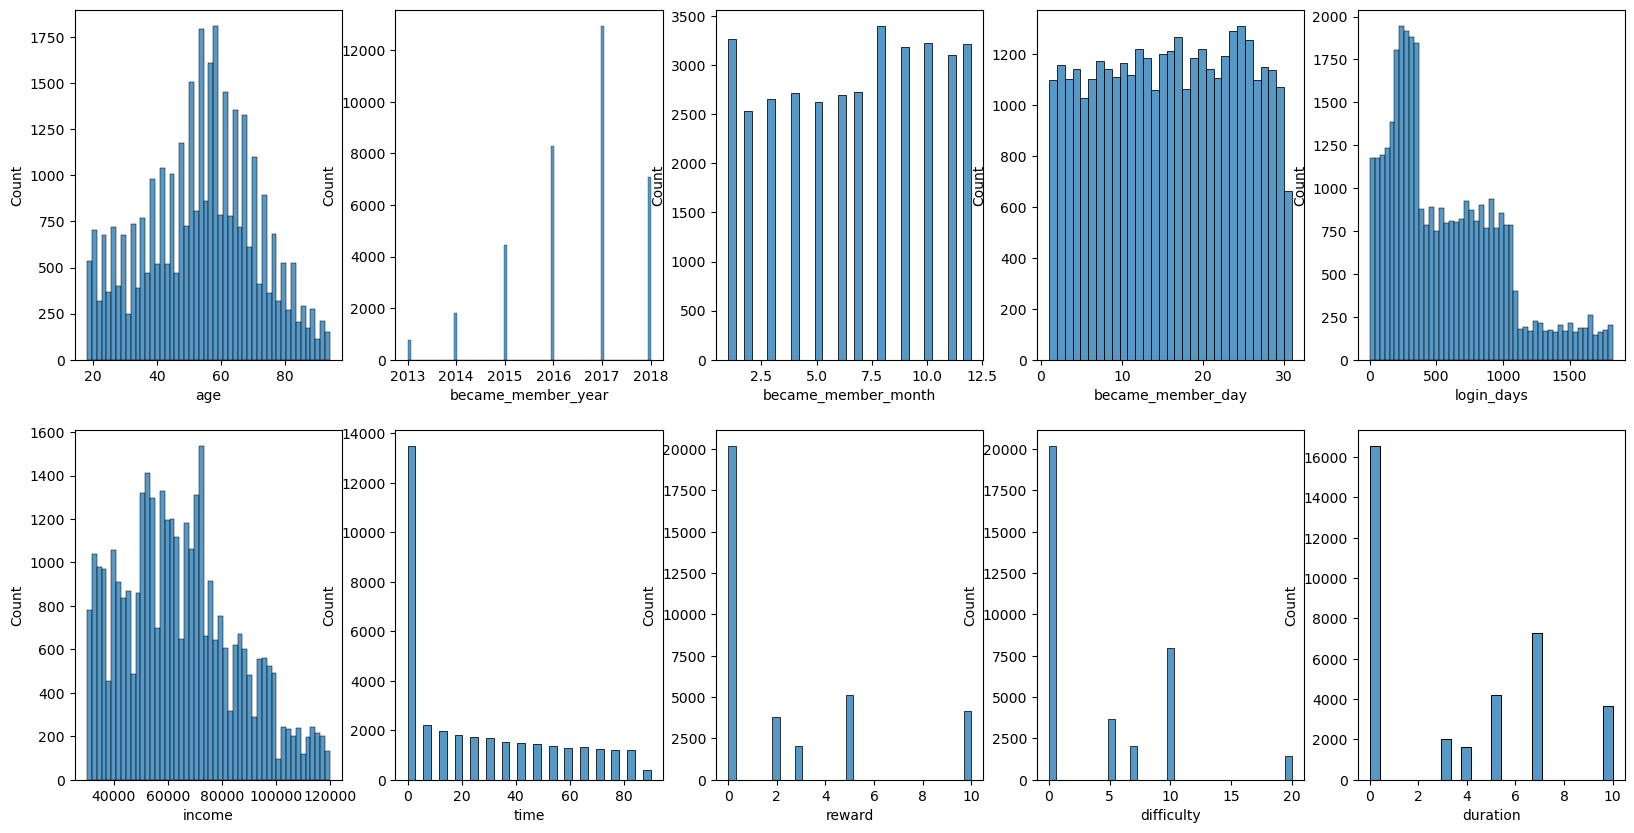

In [14]:
#visulation
numerical=df.select_dtypes(exclude="O").columns.to_list()
plt.figure(figsize=(20,10))
for i,col in enumerate(numerical,1):
    plt.subplot(2,5,i)
    sns.histplot(x=df[col])
plt.show()

- extract new feature from age called __age_group__

- __age_group__ is represented to group depend on intervial of age

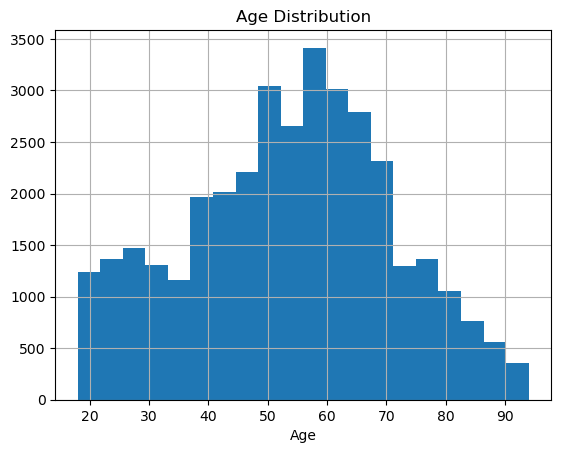

In [15]:
df['age'].hist(bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

**Age distribution shows concentration between 40–70, indicating Starbucks core customer base is middle-aged users.**

In [16]:
df["age_group"]=pd.cut(x=df["age"],bins=[18,30,40,50,60,70,80,100],
          labels=["18-30 age","30-40 age","40-50 age","50-60 age","60-70 age","70-80 age","80-above age"])

In [17]:
df[["age","age_group"]]

age  age_group
0       55  50-60 age
1       75  70-80 age
2       75  70-80 age
3       68  60-70 age
4       68  60-70 age
...    ...        ...
35491   62  60-70 age
35492   62  60-70 age
35493   62  60-70 age
35494   62  60-70 age
35495   62  60-70 age

[35339 rows x 2 columns]

Based on the univariate analysis, several numerical features such as `time`, `reward`, `difficulty`, and `duration` represent categorical-like behavior rather than continuous numerical values.
Therefore, these features will be treated as categorical variables during the preprocessing stage and encoded accordingly to ensure proper model interpretation.

Additionally, extreme outliers in the `age` feature were identified and removed to improve data quality and maintain a realistic representation of customer demographics.

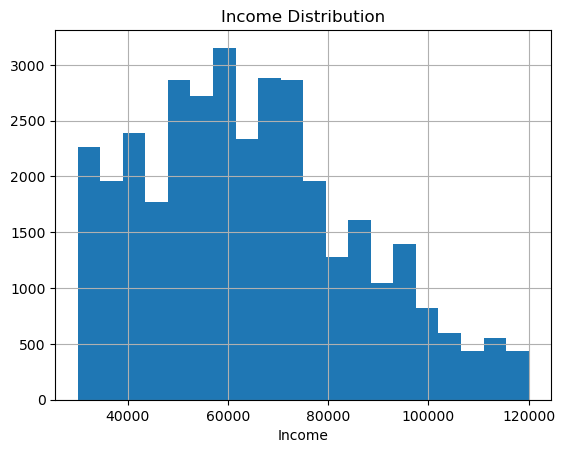

In [18]:
df['income'].hist(bins=20)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.show()

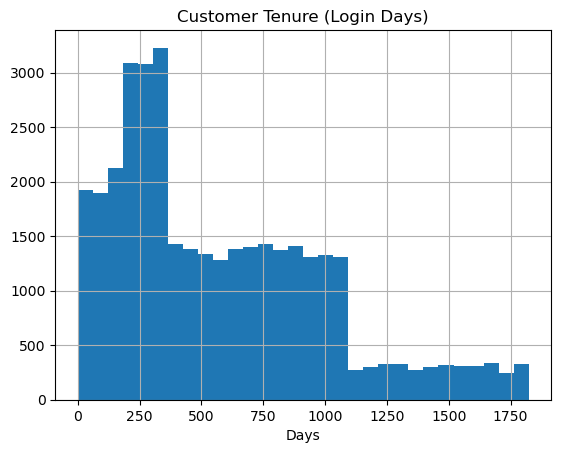

In [19]:
df['login_days'].hist(bins=30)
plt.title('Customer Tenure (Login Days)')
plt.xlabel('Days')
plt.show()

**Membership growth over time is analyzed using the year of account creation, revealing trends in customer acquisition.**

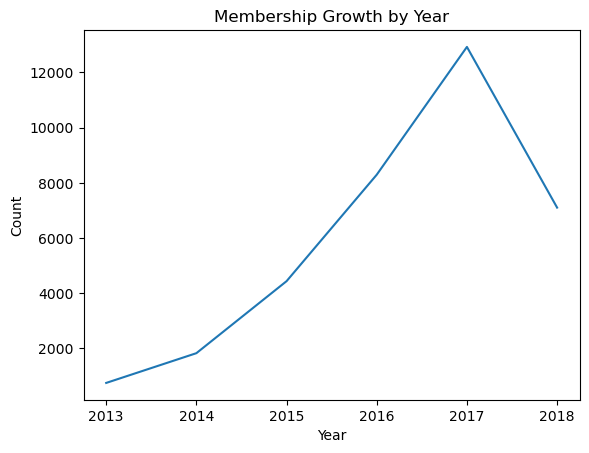

In [20]:
df['became_member_year'].value_counts().sort_index().plot(kind='line')
plt.title('Membership Growth by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

- Offer design variables (reward, difficulty, and duration) are examined individually and across offer types.

- This analysis helps understand how Starbucks structures different offers to drive engagement.

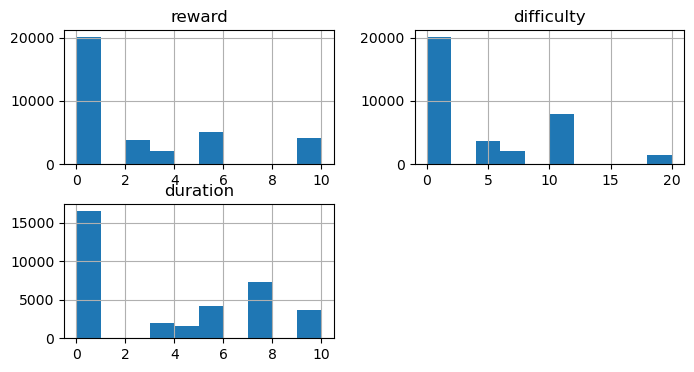

In [21]:
df[['reward', 'difficulty', 'duration']].hist(figsize=(8,4))
plt.show()

**Average reward, difficulty, and duration values are compared across offer types, highlighting strategic differences between BOGO, discount, and informational offers.**

-------------

## 2) Bivariate Analysis

Bivariate analysis examines the relationship between **two variables**.
This helps in understanding how customer characteristics interact with offer-related features.


This section explores relationships such as:
- Offer type vs event type
- Gender vs offer type
- Age group vs offer type
- Income vs offer type
- Login days vs offer type


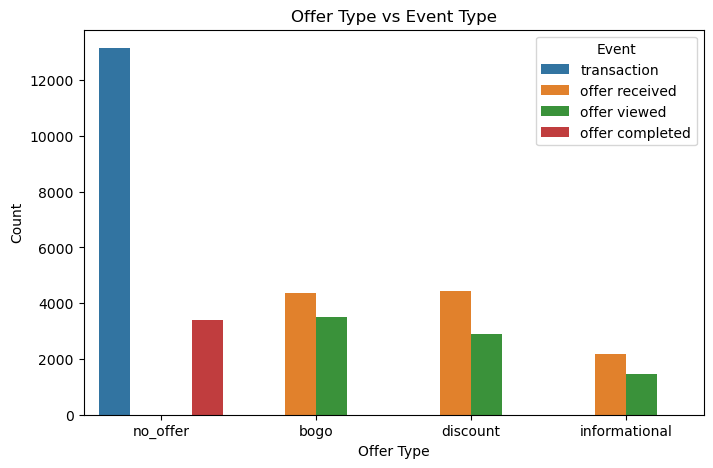

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="offer_type", hue="event")
plt.title("Offer Type vs Event Type")
plt.xlabel("Offer Type")
plt.ylabel("Count")
plt.legend(title="Event")
plt.show()


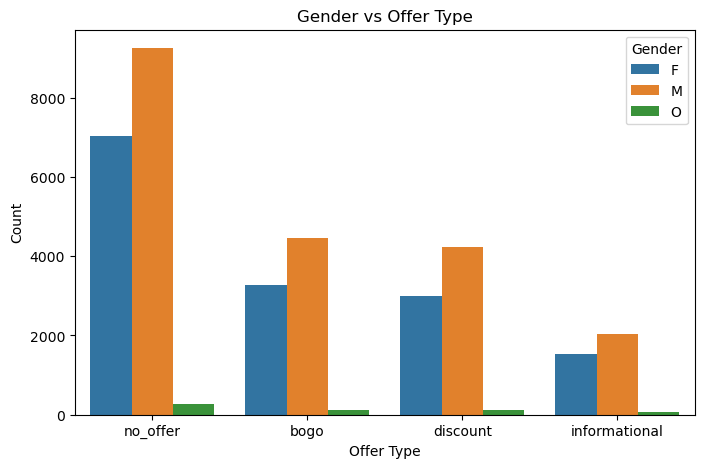

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="offer_type", hue="gender")
plt.title("Gender vs Offer Type")
plt.xlabel("Offer Type")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()


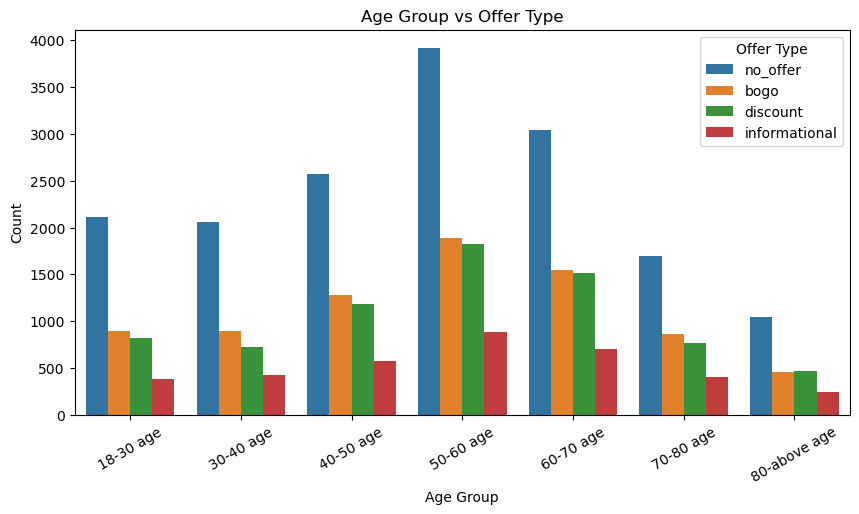

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="age_group", hue="offer_type")
plt.title("Age Group vs Offer Type")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.legend(title="Offer Type")
plt.show()


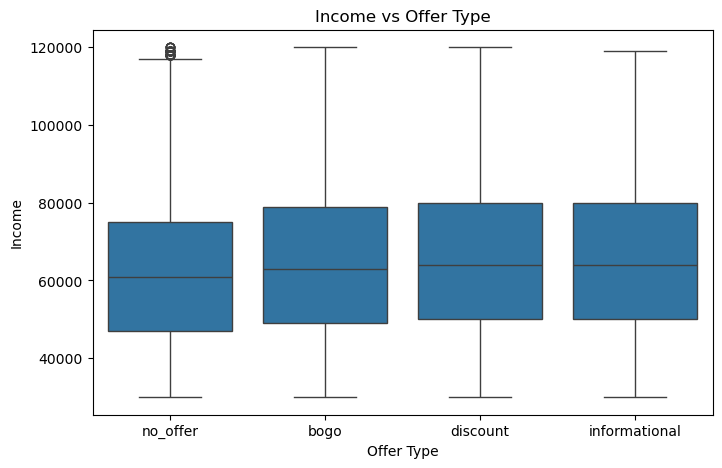

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="offer_type", y="income")
plt.title("Income vs Offer Type")
plt.xlabel("Offer Type")
plt.ylabel("Income")
plt.show()


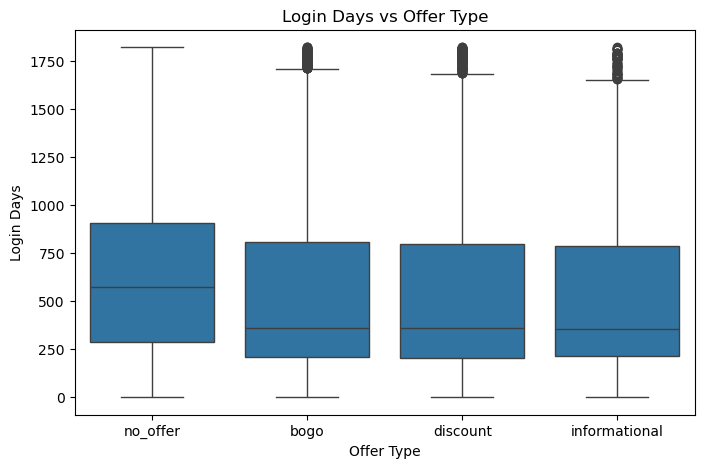

In [26]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="offer_type", y="login_days")
plt.title("Login Days vs Offer Type")
plt.xlabel("Offer Type")
plt.ylabel("Login Days")
plt.show()


**Key Observations:**

Bivariate analysis highlights clear differences in customer engagement across offer types, particularly when segmented by gender, age group, income level, and customer activity duration.

- BOGO and discount offers are more frequent among active users.
- Customers aged between 50–60 show higher interaction across most offer types.
- Higher-income users tend to receive more promotional offers.


-------------

## 3) Multivariate Analysis

Multivariate analysis studies the interaction between **three or more variables**
simultaneously. This level of analysis reveals deeper behavioral patterns that
cannot be observed using univariate or bivariate analysis alone.


This section includes:
- Age group, gender, and offer type interaction
- Event type, gender, and offer type interaction
- Correlation analysis among numerical features


### - Correlation analysis among numerical features

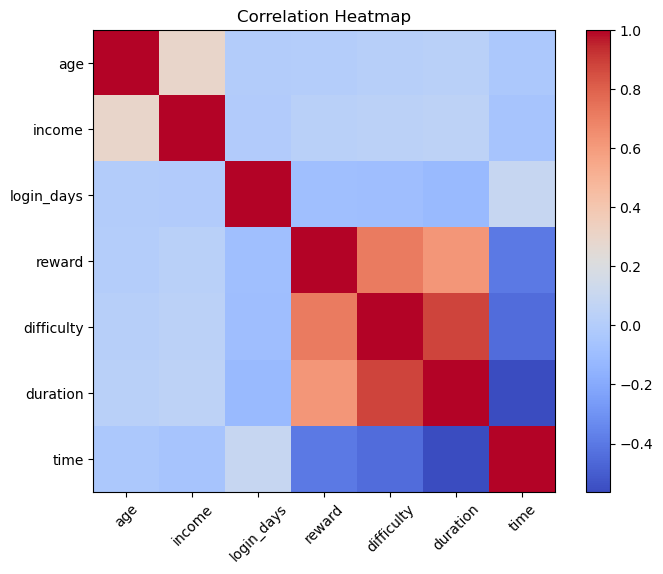

In [27]:
cols = ['age','income','login_days','reward','difficulty','duration','time']
corr = df[cols].corr()

plt.figure(figsize=(8,6))
plt.imshow(corr, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(cols)), cols, rotation=45)
plt.yticks(range(len(cols)), cols)
plt.title('Correlation Heatmap')
plt.show()

**Strong positive correlations are observed between reward, difficulty, and duration,
indicating that higher-value offers tend to require higher spending and longer validity periods.
Age and income also show a moderate positive relationship.**


### - Age group, gender, and offer type interaction

C:\Users\pc\AppData\Local\Temp\ipykernel_28104\2982197050.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["age_group", "gender", "offer_type"])
Y:\ProgramData\anaconda3\Lib\site-packages\plotly\express\_core.py:1727: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfg = df.groupby(path[i:]).agg(agg_f)
Y:\ProgramData\anaconda3\Lib\site-packages\plotly\express\_core.py:1727: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this w

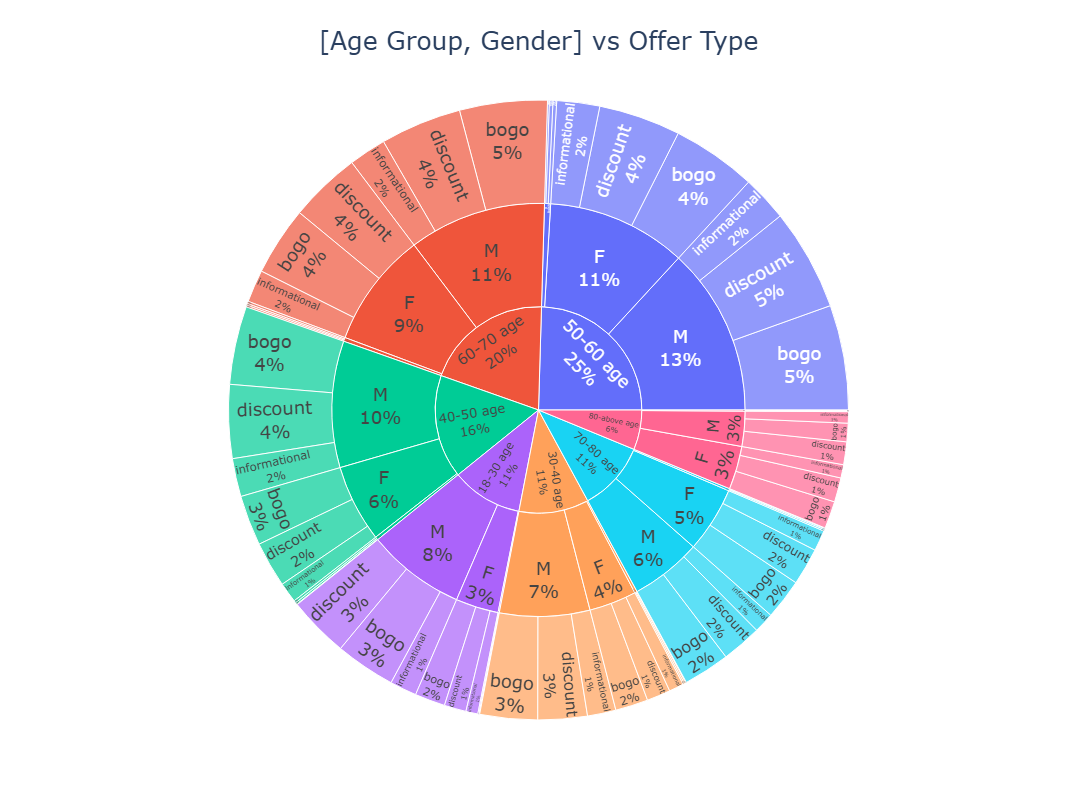

In [31]:
# Multivariate Analysis: age_group & gender vs offer_type
filtered_data = df[df["offer_type"] != "no_offer"]

df_age_gender_offer = (
    filtered_data
    .groupby(["age_group", "gender", "offer_type"])
    .size()
    .reset_index(name="count")
)

fig = px.sunburst(
    df_age_gender_offer,
    path=["age_group", "gender", "offer_type"],
    values="count",
    
    title="[Age Group, Gender] vs Offer Type"
)

fig.update_traces(textinfo="label+percent entry")
fig.update_layout(
    title_x=0.5,
    font=dict(size=18), 
    width=1000, 
    height=800  
)
fig.show()


Customers aged between **50–60**, particularly **males**, show the highest engagement.  
The most common offer types among this group are **BOGO** and **discount** offers.


### - Event type, gender, and offer type interaction

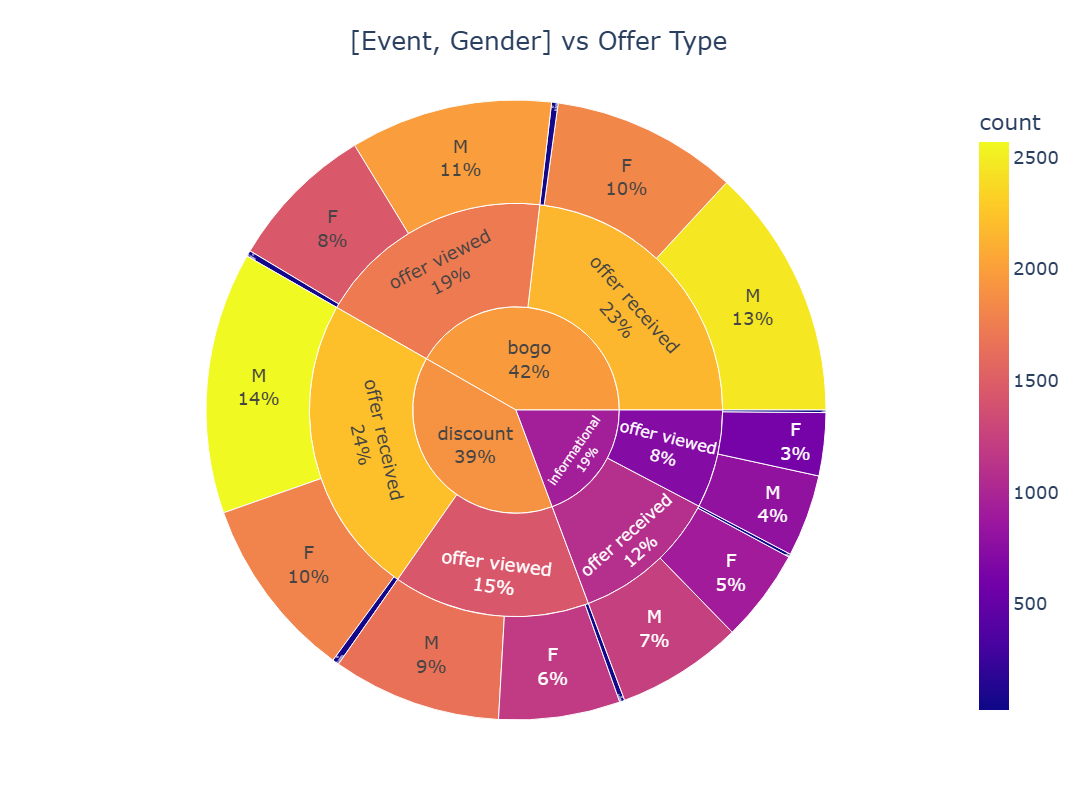

In [32]:
# Multivariate Analysis: event & gender vs offer_type

df_event_gender_offer = (
    filtered_data
    .groupby(["event", "gender", "offer_type"])
    .size()
    .reset_index(name="count")
)

fig = px.sunburst(
    df_event_gender_offer,
    path=["offer_type", "event", "gender"],
    values="count",
     color="count",
    title="[Event, Gender] vs Offer Type"
)

fig.update_traces(textinfo="label+percent entry")
fig.update_layout(title_x=0.5,font=dict(size=18),width=1000,height=800)
fig.show()


Male customers who **received BOGO offers** represent the largest interaction group,  
indicating strong engagement with this offer type across events.

-------------


## Key Insights

- Middle-aged customers (50–60) show the highest engagement with offers.
- BOGO and discount offers dominate customer interactions.
- Offer design attributes (reward, difficulty, duration) are strongly correlated.
- Customer tenure (login days) positively influences offer engagement.

## Conclusion

The exploratory analysis highlights clear relationships between customer demographics,
offer characteristics, and engagement behavior, providing a strong foundation for
predictive modeling.
